In [90]:
import pandas as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [141]:
tick = yf.Ticker("AAPL")

In [142]:
stock_hist = tick.history("max")

In [143]:
df = stock_hist.Close

### Preprocessing

In [144]:
df = df.to_frame()


In [145]:
df = df.reset_index()

In [146]:
#df.head()

In [147]:
import datetime as datetime
import pandas as pd
training_dates = pd.to_datetime(df["Date"])

In [148]:
df_for_training = df[["Close"]]

In [149]:
#df_for_training.head()

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df_for_training)

array([[-0.44449279],
       [-0.44467436],
       [-0.44491647],
       ...,
       [ 5.50670745],
       [ 5.6166709 ],
       [ 5.66696956]])

In [151]:
# Creating dataset
train_X = []
train_Y = []
#n_past = 200
n_past = 14
n_future = 1

In [152]:
df_for_training = df_for_training.values

In [153]:
#df_for_training

In [154]:
for i in range(len(df_for_training)-n_past-1):
		a = df_for_training[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		train_X.append(a)
		train_Y.append(df_for_training[i + n_past, 0])

In [155]:
# converting to array
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [156]:
print(train_X.shape, train_Y.shape)


(10364, 14) (10364,)


In [157]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], n_future)
train_X.shape

(10364, 14, 1)

In [158]:
train_Y = train_Y.reshape(train_Y.shape[0], n_future)
train_Y.shape

(10364, 1)

Model building

In [159]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM

In [160]:
# model=Sequential()
# model.add(LSTM(50, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(LSTM(50,  return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(train_Y.shape[1]))
# model.compile(loss='mean_squared_error',optimizer='adam')

In [161]:
# fiting model
#hist = model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

In [162]:
#saving the model
#model.save("de_lstm_14days.h5")

In [163]:
# loading model from tensorflow import keras
from tensorflow import keras
model = keras.models.load_model("de_lstm_14days.h5")

In [164]:
train_X[-1:].shape

(1, 14, 1)

In [165]:
train_X[-1].reshape(-1, 1).shape

(14, 1)

In [166]:
temp = train_X[-1].reshape(-1, 1)

In [167]:
temp = sc.fit_transform(temp)

In [168]:
temp_for = temp
li = []

In [169]:
temp_for

array([[-0.22584822],
       [-0.50927224],
       [-0.85530789],
       [-0.98548824],
       [-1.28868263],
       [-1.30351356],
       [-1.38095864],
       [ 0.44975324],
       [ 1.18302689],
       [ 1.15501403],
       [ 1.35769497],
       [ 0.87323901],
       [ 0.82539285],
       [ 0.70495041]])

In [202]:

# creating for loop for n number of prediction
timestamp = n_past
days = 90
li = []
for i in range(days):
    x_input_for = temp_for.reshape(1, temp_for.shape[0],1)
    pred_for = model.predict(x_input_for).flatten()
    li.append(pred_for)
    next_for = np.append(temp_for,pred_for)
    temp_for = next_for[-timestamp:]




In [203]:
li

[array([6.9791527], dtype=float32),
 array([6.979152], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.9791512], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.9791503], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.9791503], dtype=float32),
 array([6.97915], dtype=float32),
 array([6.97915], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.97915], dtype=float32),
 array([6.97915], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.979152], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.9791527], dtype=float32),
 array([6.9791527], dtype=float32),
 array([6.979152], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.979152], dtype=float32),
 array([6.9791517], dtype=float32),
 array([6.979151], dtype=float32),
 array([6.97

In [204]:
arr = np.array(li)

In [205]:
y_pred_future = sc.inverse_transform(arr)

In [218]:
y_pred_future

array([209.68764, 209.68764, 209.68764, 209.68764, 209.68764, 209.68762,
       209.68762, 209.68762, 209.68762, 209.68762, 209.68762, 209.68762,
       209.68762, 209.68762, 209.68762, 209.68762, 209.68762, 209.68762,
       209.68764, 209.68764, 209.68764, 209.68764, 209.68764, 209.68764,
       209.68764, 209.68764, 209.68764, 209.68762, 209.68764, 209.68762,
       209.68762, 209.68762, 209.68762, 209.68762, 209.68762, 209.68762,
       209.68762, 209.68762, 209.68762, 209.68762, 209.68762, 209.68764,
       209.68764, 209.68764, 209.68764, 209.68764, 209.68764, 209.68762,
       209.68762, 209.68764, 209.68764, 209.68762, 209.68762, 209.68762,
       209.68762, 209.68762, 209.68762, 209.68762, 209.68762, 209.68762,
       209.68762, 209.68764, 209.68764, 209.68764, 209.68764, 209.68765,
       209.68765, 209.68764, 209.68764, 209.68764, 209.68764, 209.68764,
       209.68764, 209.68764, 209.68764, 209.68762, 209.68764, 209.68764,
       209.68764, 209.68764, 209.68764, 209.68764, 

In [206]:
y_pred_future.shape

(90, 1)

In [207]:
y_pred_future = y_pred_future.flatten()

In [208]:

forecast_period_date = pd.date_range(list(training_dates)[-1], periods=days, freq="1d").tolist()

In [209]:
len(forecast_period_date)

90

In [210]:
# forecast = model1.predict(train_X[-n_future:])
# forecast

In [211]:
# forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
# y_pred_future = forecast_copies

In [212]:
forecast_dates = []
for time_i in forecast_period_date:
   forecast_dates.append(time_i.date())

In [213]:
# y_pred_future = y_pred_future.flatten()

In [221]:
df_future = pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})

In [222]:
df_future["Date"] = pd.to_datetime(df_future["Date"])

In [223]:
df_future.head()

,Date,Close
0,2022-02-09,209.687637
1,2022-02-10,209.687637
2,2022-02-11,209.687637
3,2022-02-12,209.687637
4,2022-02-13,209.687637


In [219]:
original = stock_hist["Close"]
original = original.to_frame().reset_index()

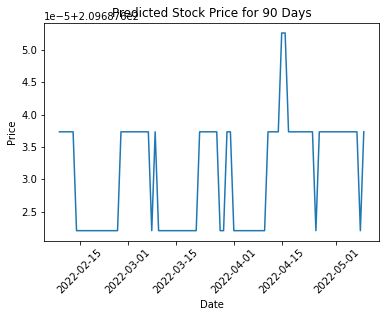

In [224]:
plt.title(f"Predicted Stock Price for {days} Days")
plt.plot(forecast_dates,  y_pred_future)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
from datetime import date

In [ ]:
two_year = 

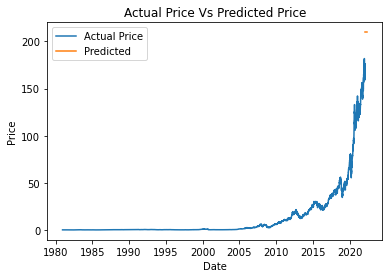

In [225]:
plt.title("Actual Price Vs Predicted Price")
plt.plot(original["Date"], original["Close"], label="Actual Price")
plt.plot(df_future["Date"], df_future["Close"], label="Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [187]:
df_future

,Date,Close
0,2022-02-09,169.803177
1,2022-02-10,169.103271
2,2022-02-11,169.976807
3,2022-02-12,171.889359
4,2022-02-13,173.977005
...,...,...
995,2024-10-31,209.687637
996,2024-11-01,209.687637
997,2024-11-02,209.687637
998,2024-11-03,209.687637


In [188]:
#dumping model
# import pickle
# filename = "trained_model.sav"
# pickle.dump(model1, open(filename, 'wb'))
#loaded_model = pickle.load(open("stock_prediction_lstm.h5", 'rb'))